In [14]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path ="C:\\Users\\agaje\\Desktop\\EDA\\medallists.csv"  # Path to your uploaded file
df = pd.read_csv(file_path)

# Display the first 5 rows of the DataFrame
df.head()


,medal_date,medal_type,medal_code,name,gender,country_code,country,country_long,nationality,team,team_gender,discipline,event,event_type,url_event,birth_date,code_athlete,code_team
0,2024-07-27,Gold Medal,1.0,EVENEPOEL Remco,Male,BEL,Belgium,Belgium,Belgium,NaN,NaN,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,2000-01-25,1903136,NaN
1,2024-07-27,Silver Medal,2.0,GANNA Filippo,Male,ITA,Italy,Italy,Italy,NaN,NaN,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,1996-07-25,1923520,NaN
2,2024-07-27,Bronze Medal,3.0,van AERT Wout,Male,BEL,Belgium,Belgium,Belgium,NaN,NaN,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,1994-09-15,1903147,NaN
3,2024-07-27,Gold Medal,1.0,BROWN Grace,Female,AUS,Australia,Australia,Australia,NaN,NaN,Cycling Road,Women's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/women-s-in...,1992-07-07,1940173,NaN
4,2024-07-27,Silver Medal,2.0,HENDERSON Anna,Female,GBR,Great Britain,Great Britain,Great Britain,NaN,NaN,Cycling Road,Women's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/women-s-in...,1998-11-14,1912525,NaN


In [22]:
import pandas as pd                                                         #2

# Load the CSV file (replace 'medallists.csv' with your file path)
medal_data = pd.read_csv("C:\\Users\\agaje\\Desktop\\EDA\\medallists.csv")

# Drop any rows with missing country or gender data
cleaned_data = medal_data.dropna(subset=['country', 'gender'])

# Group the data by country and gender to count the number of medals won by each
country_gender_representation = cleaned_data.groupby(['country', 'gender']).size().unstack().fillna(0)

# Rename the columns for better clarity
country_gender_representation.columns = ['Female Medals', 'Male Medals']

# Sort the result by the total number of medals (both male and female)
country_gender_representation['Total Medals'] = country_gender_representation['Female Medals'] + country_gender_representation['Male Medals']
sorted_representation = country_gender_representation.sort_values(by='Total Medals', ascending=False)

# Display the top countries by male and female medalists
sorted_representation.head()


,Female Medals,Male Medals,Total Medals
country,,,
United States,187.0,143.0,330.0
France,61.0,125.0,186.0
China,112.0,56.0,168.0
Great Britain,81.0,80.0,161.0
Australia,76.0,47.0,123.0


C:\Users\agaje\AppData\Local\Temp\ipykernel_10948\764579963.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medal_data_clean['birth_date'] = pd.to_datetime(medal_data_clean['birth_date'])
C:\Users\agaje\AppData\Local\Temp\ipykernel_10948\764579963.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medal_data_clean['age'] = 2024 - medal_data_clean['birth_date'].dt.year


             mean  median       std
gender                             
Female  26.482788    26.0  4.860160
Male    27.286087    27.0  5.015457


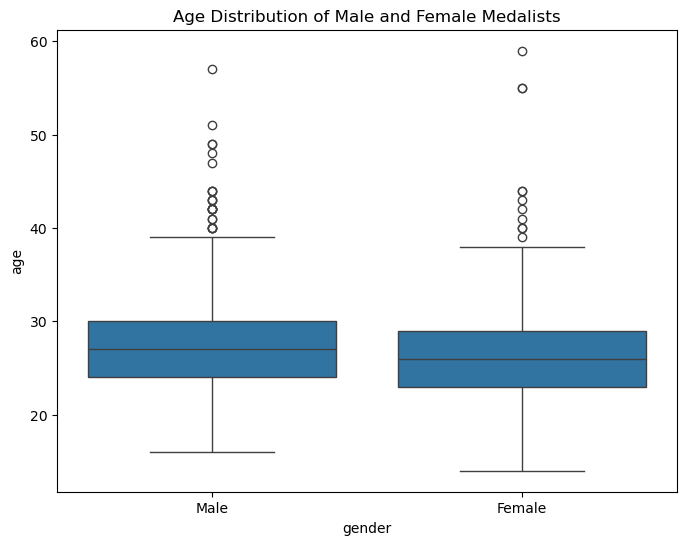

In [40]:
import pandas as pd                                                         #6
import numpy as np

# Load the CSV file (replace 'medallists.csv' with your file path)
medal_data = pd.read_csv("C:\\Users\\agaje\\Desktop\\EDA\\medallists.csv")

# Drop rows with missing birth_date or gender information
medal_data_clean = medal_data.dropna(subset=['birth_date', 'gender'])

# Convert birth_date to datetime format
medal_data_clean['birth_date'] = pd.to_datetime(medal_data_clean['birth_date'])

# Extract year of birth and calculate age (assuming the event year is 2024)
medal_data_clean['age'] = 2024 - medal_data_clean['birth_date'].dt.year

# Group by gender to calculate average and median age
age_by_gender = medal_data_clean.groupby('gender')['age'].agg(['mean', 'median', 'std'])

# Display the age statistics for male and female medalists
print(age_by_gender)

# Optional: Visualize the age distribution using a boxplot (if you have matplotlib installed)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='age', data=medal_data_clean)
plt.title('Age Distribution of Male and Female Medalists')
plt.show()


        Bronze Medals  Gold Medals  Silver Medals
gender                                           
Female            402          378            382
Male              403          373            374


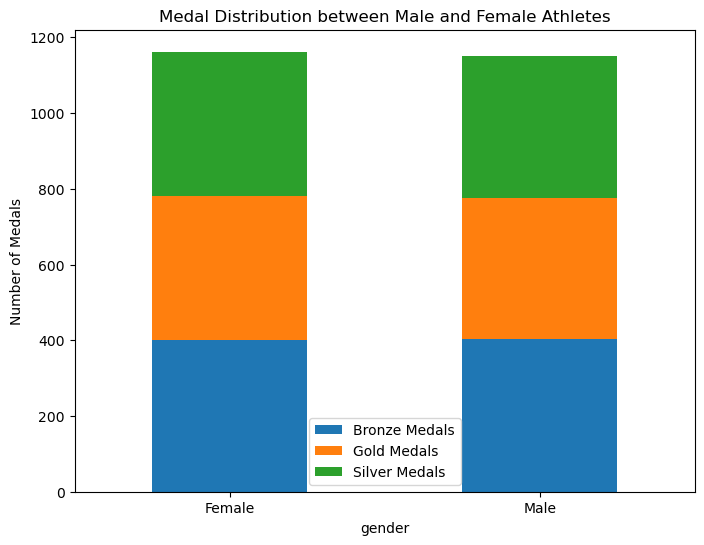

In [28]:
import pandas as pd                                                     # 1

# Load the CSV file (replace 'medallists.csv' with your file path)
medal_data = pd.read_csv("C:\\Users\\agaje\\Desktop\\EDA\\medallists.csv")

# Drop rows with missing gender or medal_type information
cleaned_data = medal_data.dropna(subset=['gender', 'medal_type'])

# Group the data by gender and medal type to count the number of each medal won by male and female athletes
medal_distribution = cleaned_data.groupby(['gender', 'medal_type']).size().unstack().fillna(0)

# Rename the columns for better clarity
medal_distribution.columns = ['Bronze Medals', 'Gold Medals', 'Silver Medals']

# Display the medal distribution
print(medal_distribution)

# Optional: Visualize the medal distribution using a bar plot (if you have matplotlib installed)
import matplotlib.pyplot as plt

medal_distribution.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Medal Distribution between Male and Female Athletes')
plt.ylabel('Number of Medals')
plt.xticks(rotation=0)
plt.show()


In [68]:
import pandas as pd                                     #4

# Load the CSV file (replace 'medallists.csv' with your file path)
medal_data = pd.read_csv("C:\\Users\\agaje\\Desktop\\EDA\\medallists.csv")

# Drop rows with missing gender or event information
cleaned_data = medal_data.dropna(subset=['gender', 'event'])

# Group the data by event and gender, then count unique events for each gender
event_count_by_gender = cleaned_data.groupby('gender')['event'].nunique()

# Display the number of unique events for male and female athletes
print(event_count_by_gender)

# Calculate the difference between male and female events
difference = event_count_by_gender['Male'] - event_count_by_gender['Female']
print(f"There are {difference} more events where male athletes won medals compared to female athletes." if difference > 0 else f"There are {abs(difference)} more events where female athletes won medals compared to male athletes.")


gender
Female    150
Male      155
Name: event, dtype: int64
There are 5 more events where male athletes won medals compared to female athletes.


                     Female Medals  Male Medals  Female Percentage  \
discipline                                                           
Artistic Swimming             33.0          0.0         100.000000   
Rhythmic Gymnastics           18.0          0.0         100.000000   
Wrestling                     24.0         48.0          33.333333   
Equestrian                    15.0         29.0          34.090909   
Artistic Gymnastics           30.0         37.0          44.776119   

                     Male Percentage  Dominance Difference  
discipline                                                  
Artistic Swimming           0.000000            100.000000  
Rhythmic Gymnastics         0.000000            100.000000  
Wrestling                  66.666667             33.333333  
Equestrian                 65.909091             31.818182  
Artistic Gymnastics        55.223881             10.447761  


<Figure size 1000x600 with 0 Axes>

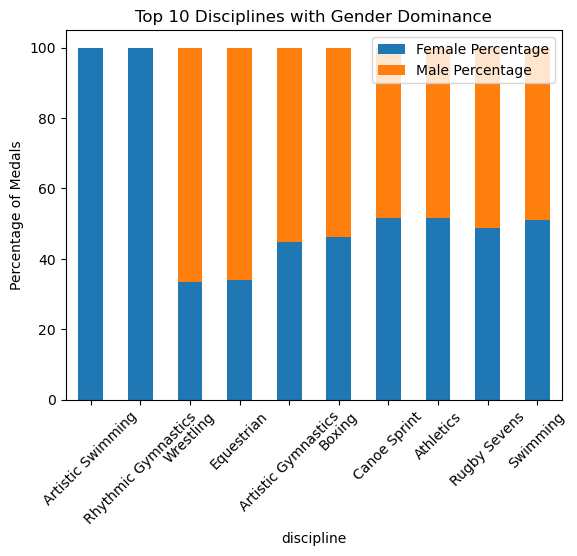

In [70]:
import pandas as pd                              #3

# Load the CSV file (replace 'medallists.csv' with your file path)
medal_data = pd.read_csv("C:\\Users\\agaje\\Desktop\\EDA\\medallists.csv")

# Drop rows with missing gender or discipline information
cleaned_data = medal_data.dropna(subset=['gender', 'discipline'])

# Group the data by discipline and gender to count the number of medals won in each discipline by gender
discipline_gender_distribution = cleaned_data.groupby(['discipline', 'gender']).size().unstack().fillna(0)

# Rename the columns for better clarity
discipline_gender_distribution.columns = ['Female Medals', 'Male Medals']

# Calculate the total number of medals in each discipline
discipline_gender_distribution['Total Medals'] = discipline_gender_distribution['Female Medals'] + discipline_gender_distribution['Male Medals']

# Calculate the percentage of medals won by each gender
discipline_gender_distribution['Female Percentage'] = (discipline_gender_distribution['Female Medals'] / discipline_gender_distribution['Total Medals']) * 100
discipline_gender_distribution['Male Percentage'] = (discipline_gender_distribution['Male Medals'] / discipline_gender_distribution['Total Medals']) * 100

# Sort the disciplines by the difference in percentage between male and female medals
discipline_gender_distribution['Dominance Difference'] = abs(discipline_gender_distribution['Female Percentage'] - discipline_gender_distribution['Male Percentage'])

# Sort disciplines by dominance difference and display the top results
dominance_by_gender = discipline_gender_distribution.sort_values(by='Dominance Difference', ascending=False)

# Display the top disciplines where one gender dominates
print(dominance_by_gender[['Female Medals', 'Male Medals', 'Female Percentage', 'Male Percentage', 'Dominance Difference']].head())

# Optional: Visualize the gender dominance in sports disciplines using a bar plot (if you have matplotlib installed)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
dominance_by_gender[['Female Percentage', 'Male Percentage']].head(10).plot(kind='bar', stacked=True)
plt.title('Top 10 Disciplines with Gender Dominance')
plt.ylabel('Percentage of Medals')
plt.xticks(rotation=45)
plt.show()


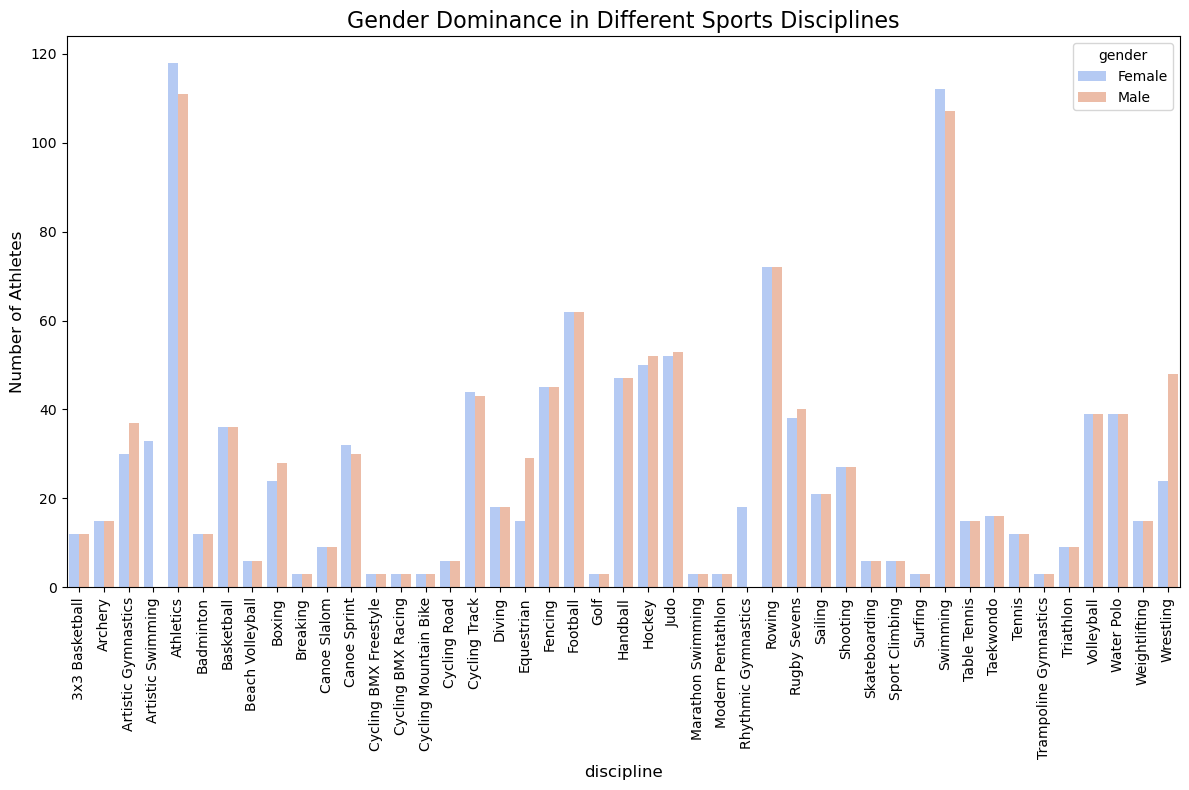

In [72]:
import pandas as pd                                                          #1
import matplotlib.pyplot as plt
import seaborn as sns

# Corrected file path with double backslashes
file_path = "C:\\Users\\agaje\\Desktop\\EDA\\medallists.csv"

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Create a pivot table to analyze gender distribution by sport
gender_sport_distribution = df.pivot_table(index='discipline', columns='gender', aggfunc='size', fill_value=0)

# Reset the index for easier plotting
gender_sport_distribution = gender_sport_distribution.reset_index()

# Melt the DataFrame to long format for seaborn plotting
gender_sport_distribution_melted = gender_sport_distribution.melt(id_vars='discipline', var_name='gender', value_name='Count')

# Plot the data using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='discipline', y='Count', hue='gender', data=gender_sport_distribution_melted, palette='coolwarm')

# Rotate the x-axis labels for readability
plt.xticks(rotation=90)

# Add labels and title
plt.title('Gender Dominance in Different Sports Disciplines', fontsize=16)
plt.xlabel('discipline', fontsize=12)
plt.ylabel('Number of Athletes', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

Index(['medal_date', 'medal_type', 'medal_code', 'name', 'gender',
       'country_code', 'country', 'country_long', 'nationality', 'team',
       'team_gender', 'discipline', 'event', 'event_type', 'url_event',
       'birth_date', 'code_athlete', 'code_team'],
      dtype='object')


C:\Users\agaje\AppData\Local\Temp\ipykernel_10948\4154264139.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gender', y='Event Count', data=events_by_gender_df, palette='Set2')


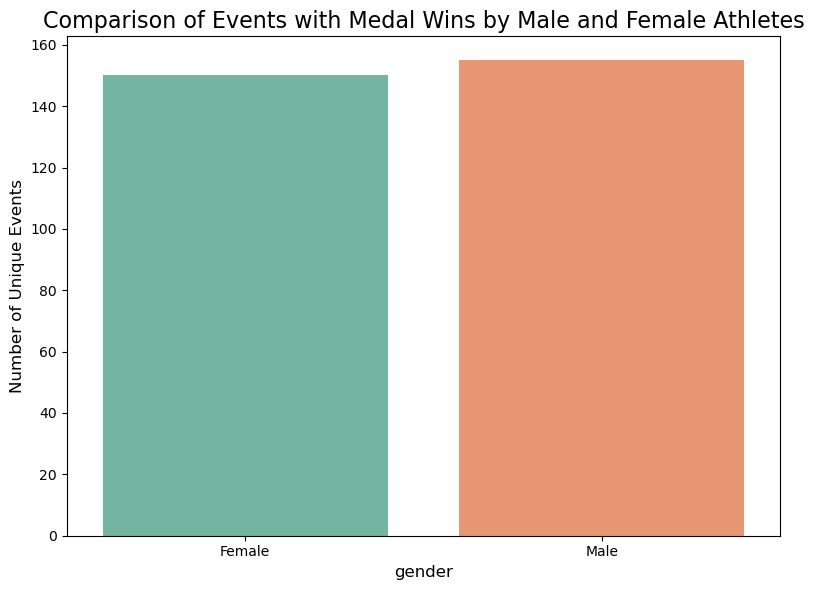

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Corrected file path with double backslashes
file_path = "C:\\Users\\agaje\\Desktop\\EDA\\medallists.csv"

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Check column names to ensure 'Event' and 'Gender' are correct
print(df.columns)

# Group by Event and Gender, then count unique events for each gender
events_by_gender = df.groupby('gender')['event'].nunique()

# Convert to DataFrame for easier plotting
events_by_gender_df = events_by_gender.reset_index(name='Event Count')

# Plot the data using seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='gender', y='Event Count', data=events_by_gender_df, palette='Set2')

# Add labels and title
plt.title('Comparison of Events with Medal Wins by Male and Female Athletes', fontsize=16)
plt.xlabel('gender', fontsize=12)
plt.ylabel('Number of Unique Events', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

                     Female Medals  Male Medals  Female Percentage  \
discipline                                                           
Artistic Swimming             33.0          0.0         100.000000   
Rhythmic Gymnastics           18.0          0.0         100.000000   
Wrestling                     24.0         48.0          33.333333   
Equestrian                    15.0         29.0          34.090909   
Artistic Gymnastics           30.0         37.0          44.776119   

                     Male Percentage  Dominance Difference  
discipline                                                  
Artistic Swimming           0.000000            100.000000  
Rhythmic Gymnastics         0.000000            100.000000  
Wrestling                  66.666667             33.333333  
Equestrian                 65.909091             31.818182  
Artistic Gymnastics        55.223881             10.447761  


<Figure size 1000x600 with 0 Axes>

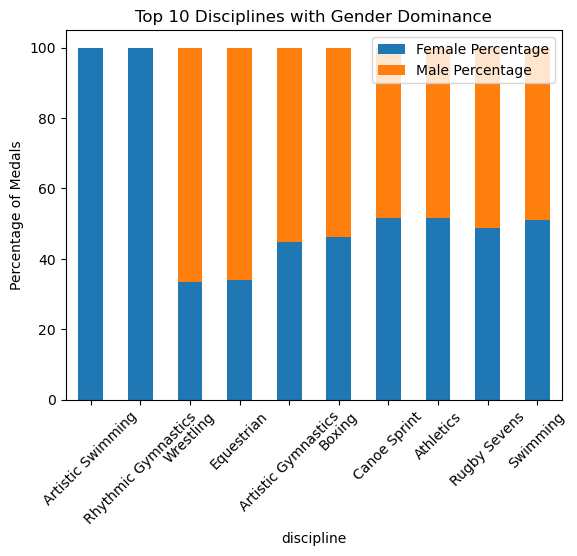

In [58]:
import pandas as pd

# Load the CSV file (replace 'medallists.csv' with your file path)
medal_data = pd.read_csv("C:\\Users\\agaje\\Desktop\\EDA\\medallists.csv")

# Drop rows with missing gender or discipline information
cleaned_data = medal_data.dropna(subset=['gender', 'discipline'])

# Group the data by discipline and gender to count the number of medals won in each discipline by gender
discipline_gender_distribution = cleaned_data.groupby(['discipline', 'gender']).size().unstack().fillna(0)

# Rename the columns for better clarity
discipline_gender_distribution.columns = ['Female Medals', 'Male Medals']

# Calculate the total number of medals in each discipline
discipline_gender_distribution['Total Medals'] = discipline_gender_distribution['Female Medals'] + discipline_gender_distribution['Male Medals']

# Calculate the percentage of medals won by each gender
discipline_gender_distribution['Female Percentage'] = (discipline_gender_distribution['Female Medals'] / discipline_gender_distribution['Total Medals']) * 100
discipline_gender_distribution['Male Percentage'] = (discipline_gender_distribution['Male Medals'] / discipline_gender_distribution['Total Medals']) * 100

# Sort the disciplines by the difference in percentage between male and female medals
discipline_gender_distribution['Dominance Difference'] = abs(discipline_gender_distribution['Female Percentage'] - discipline_gender_distribution['Male Percentage'])

# Sort disciplines by dominance difference and display the top results
dominance_by_gender = discipline_gender_distribution.sort_values(by='Dominance Difference', ascending=False)

# Display the top disciplines where one gender dominates
print(dominance_by_gender[['Female Medals', 'Male Medals', 'Female Percentage', 'Male Percentage', 'Dominance Difference']].head())

# Optional: Visualize the gender dominance in sports disciplines using a bar plot (if you have matplotlib installed)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
dominance_by_gender[['Female Percentage', 'Male Percentage']].head(10).plot(kind='bar', stacked=True)
plt.title('Top 10 Disciplines with Gender Dominance')
plt.ylabel('Percentage of Medals')
plt.xticks(rotation=45)
plt.show()


In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Corrected file path with double backslashes
file_path = "C:\\Users\\agaje\\Desktop\\EDA\\medallists.csv"

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Create a pivot table to analyze gender distribution by sport
gender_sport_distribution = df.pivot_table(index='discipline', columns='gender', aggfunc='size', fill_value=0)

# Reset the index for easier plotting
gender_sport_distribution = gender_sport_distribution.reset_index()

# Calculate total counts for sorting purposes
gender_sport_distribution['Total'] = gender_sport_distribution.sum(axis=1)

# Sort by total count in ascending order
gender_sport_distribution_sorted = gender_sport_distribution.sort_values(by='Total', ascending=True)

# Melt the DataFrame to long format for seaborn plotting
gender_sport_distribution_melted = gender_sport_distribution_sorted.melt(id_vars=['discipline', 'Total'], var_name='gender', value_name='Count')

# Plot the data using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='discipline', y='Count', hue='gender', data=gender_sport_distribution_melted, palette='coolwarm')

# Rotate the x-axis labels for readability
plt.xticks(rotation=90)

# Add labels and title
plt.title('Gender Dominance in Different Sports Disciplines (Sorted by Total Count)', fontsize=16)
plt.xlabel('discipline', fontsize=12)
plt.ylabel('Number of Athletes', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

TypeError: can only concatenate str (not "int") to str

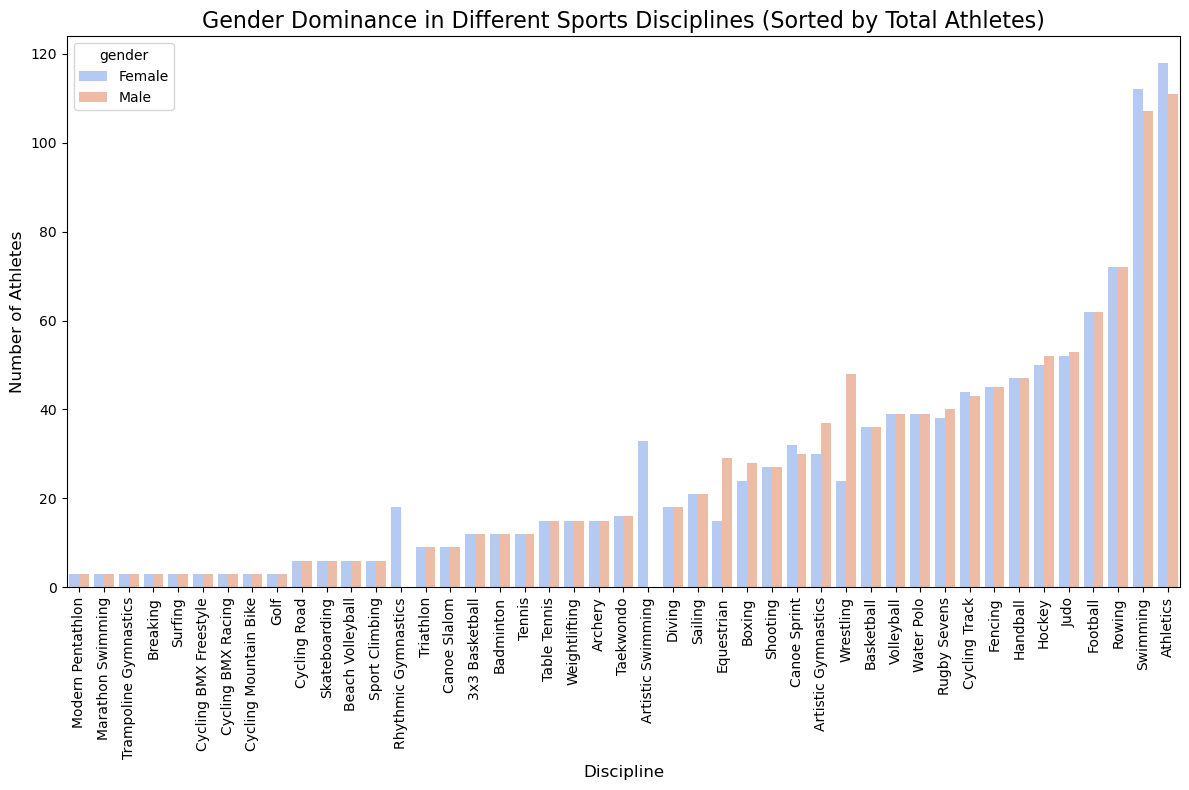

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Corrected file path with double backslashes (use your file path)
file_path = "C:\\Users\\agaje\\Desktop\\EDA\\medallists.csv"

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Create a pivot table to analyze gender distribution by sport
gender_sport_distribution = df.pivot_table(index='discipline', columns='gender', aggfunc='size', fill_value=0)

# Add a column for total athletes (to sort by)
gender_sport_distribution['Total'] = gender_sport_distribution.sum(axis=1)

# Sort the data by total number of athletes in ascending order
gender_sport_distribution = gender_sport_distribution.sort_values('Total', ascending=True)

# Reset the index for easier plotting
gender_sport_distribution = gender_sport_distribution.reset_index()

# Melt the DataFrame to long format for seaborn plotting
gender_sport_distribution_melted = gender_sport_distribution.melt(id_vars=['discipline', 'Total'], var_name='gender', value_name='Count')

# Plot the data using seaborn, sorted by the total number of athletes
plt.figure(figsize=(12, 8))
sns.barplot(x='discipline', y='Count', hue='gender', data=gender_sport_distribution_melted, palette='coolwarm', order=gender_sport_distribution['discipline'])

# Rotate the x-axis labels for readability
plt.xticks(rotation=90)

# Add labels and title
plt.title('Gender Dominance in Different Sports Disciplines (Sorted by Total Athletes)', fontsize=16)
plt.xlabel('Discipline', fontsize=12)
plt.ylabel('Number of Athletes', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


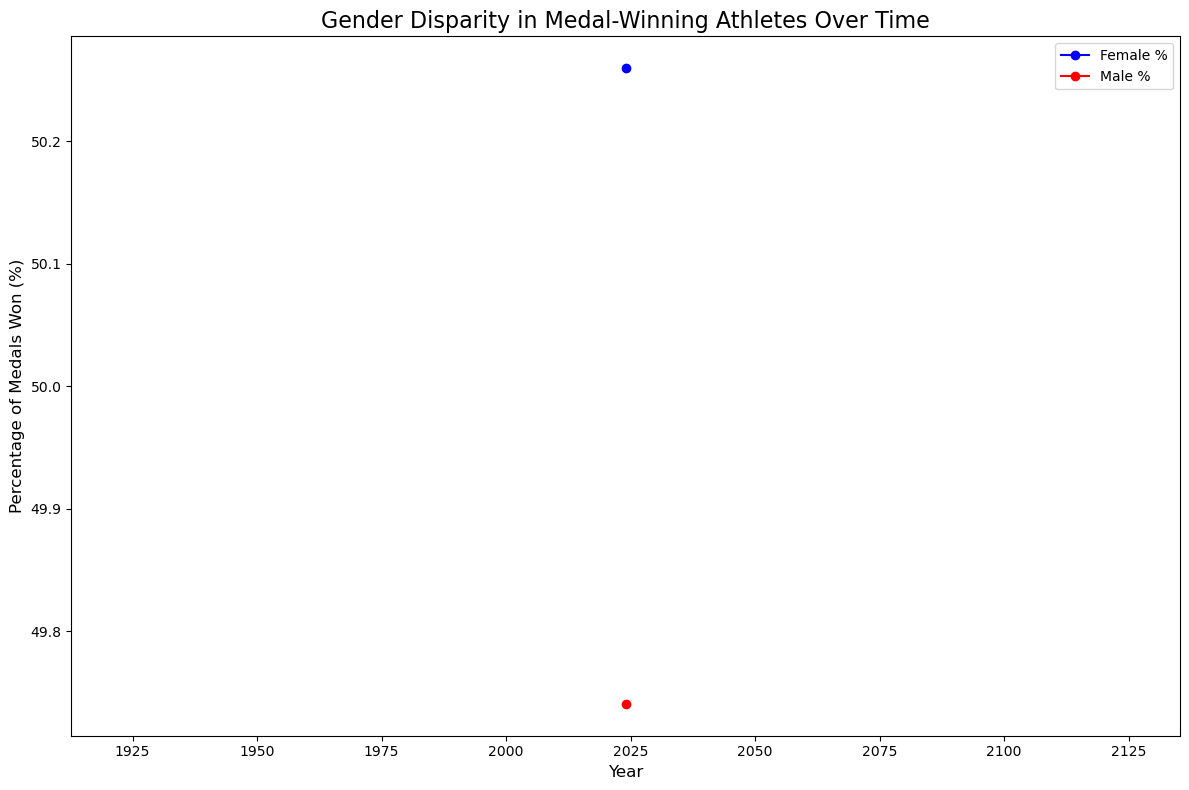

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Corrected file path (replace with your actual file path)
file_path = "C:\\Users\\agaje\\Desktop\\EDA\\medallists.csv"

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Ensure 'medal_date' is in datetime format
df['medal_date'] = pd.to_datetime(df['medal_date'])

# Extract the year from the 'medal_date'
df['year'] = df['medal_date'].dt.year

# Drop rows with missing gender or year information
df_cleaned = df.dropna(subset=['gender', 'year'])

# Group the data by year and gender, counting the number of medals won by each gender
gender_year_distribution = df_cleaned.groupby(['year', 'gender']).size().unstack().fillna(0)

# Add a total medals column for each year
gender_year_distribution['Total'] = gender_year_distribution['Female'] + gender_year_distribution['Male']

# Calculate the percentage of medals won by each gender per year
gender_year_distribution['Female %'] = (gender_year_distribution['Female'] / gender_year_distribution['Total']) * 100
gender_year_distribution['Male %'] = (gender_year_distribution['Male'] / gender_year_distribution['Total']) * 100

# Plot the trend of gender disparity over time
plt.figure(figsize=(12, 8))
plt.plot(gender_year_distribution.index, gender_year_distribution['Female %'], label='Female %', color='blue', marker='o')
plt.plot(gender_year_distribution.index, gender_year_distribution['Male %'], label='Male %', color='red', marker='o')

# Add labels, title, and legend
plt.title('Gender Disparity in Medal-Winning Athletes Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage of Medals Won (%)', fontsize=12)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


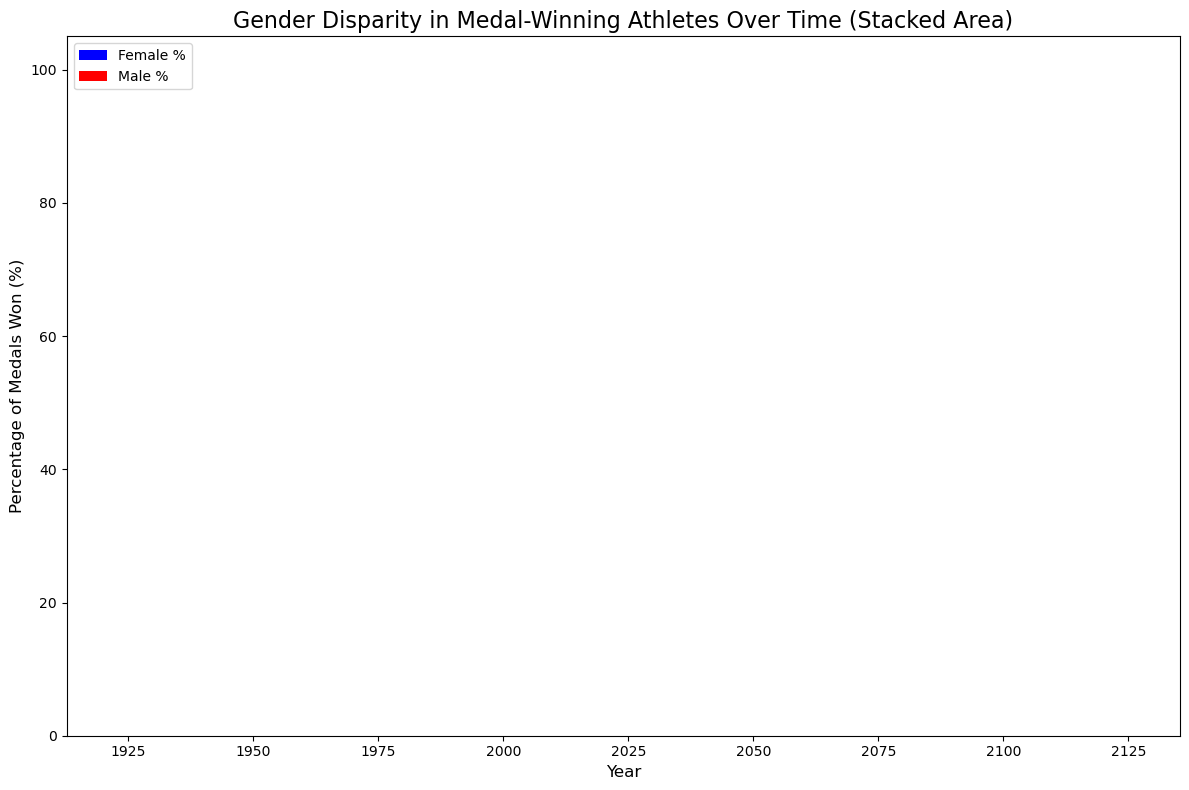

In [76]:
import matplotlib.pyplot as plt

# Plot a stacked area chart
plt.figure(figsize=(12, 8))
plt.stackplot(gender_year_distribution.index, 
              gender_year_distribution['Female %'], gender_year_distribution['Male %'], 
              labels=['Female %', 'Male %'], colors=['blue', 'red'])

# Add labels, title, and legend
plt.title('Gender Disparity in Medal-Winning Athletes Over Time (Stacked Area)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage of Medals Won (%)', fontsize=12)
plt.legend(loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

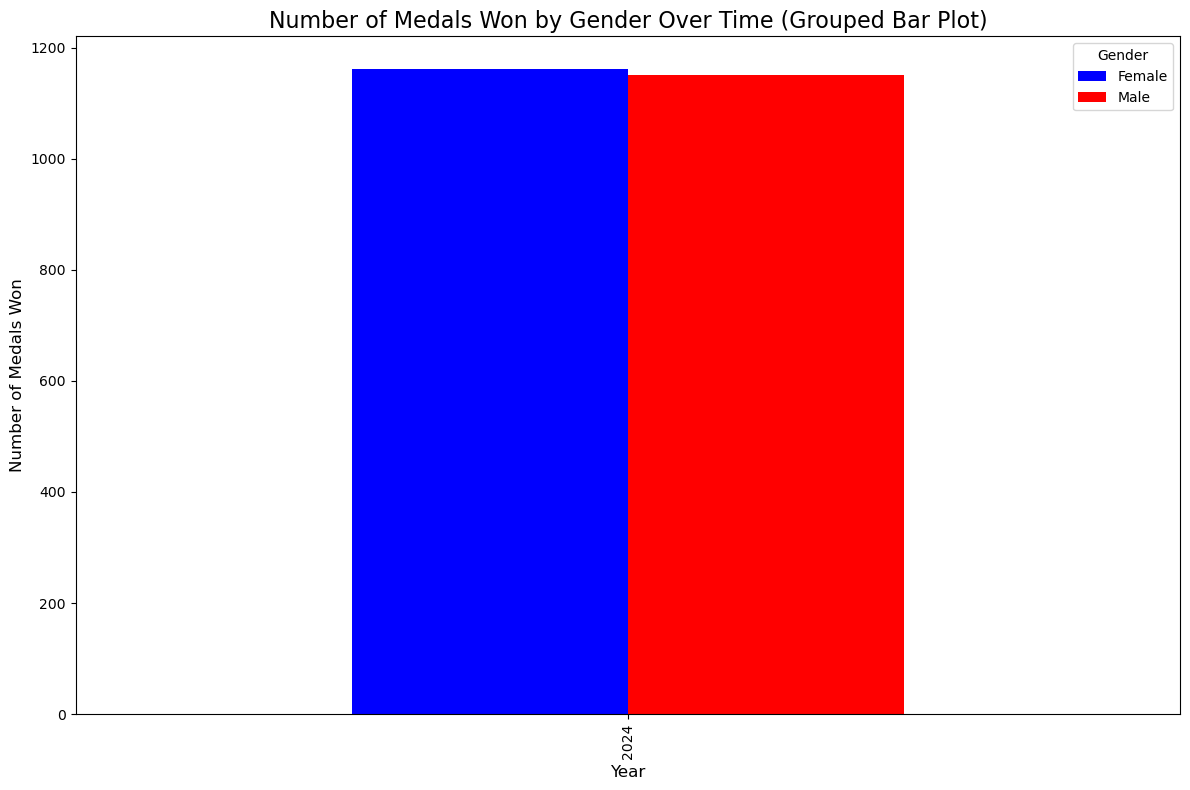

In [78]:
# Plot the number of medals won by gender for each year (grouped bar plot)
gender_year_counts = df_cleaned.groupby(['year', 'gender']).size().unstack().fillna(0)

plt.figure(figsize=(12, 8))
gender_year_counts.plot(kind='bar', stacked=False, color=['blue', 'red'], figsize=(12, 8))

# Add labels, title, and legend
plt.title('Number of Medals Won by Gender Over Time (Grouped Bar Plot)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Medals Won', fontsize=12)
plt.legend(title='Gender')

# Show the plot
plt.tight_layout()
plt.show()


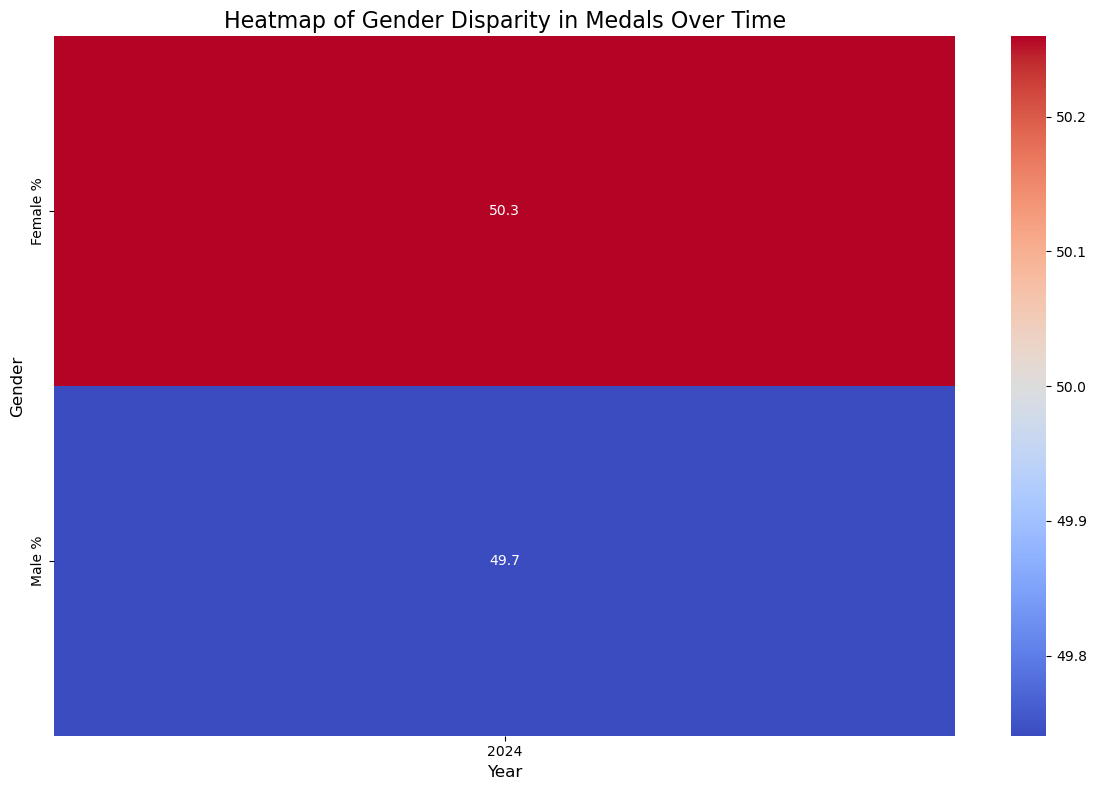

In [80]:
import seaborn as sns

# Create a heatmap of gender percentage over time
plt.figure(figsize=(12, 8))
sns.heatmap(gender_year_distribution[['Female %', 'Male %']].T, cmap='coolwarm', annot=True, cbar=True, fmt='.1f')

# Add labels and title
plt.title('Heatmap of Gender Disparity in Medals Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Gender', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


C:\Users\agaje\AppData\Local\Temp\ipykernel_10948\1518403106.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(x=gender_year_distribution.index, y='Female %', data=gender_year_distribution, label='Female %', ci='sd')
C:\Users\agaje\AppData\Local\Temp\ipykernel_10948\1518403106.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(x=gender_year_distribution.index, y='Male %', data=gender_year_distribution, label='Male %', ci='sd')


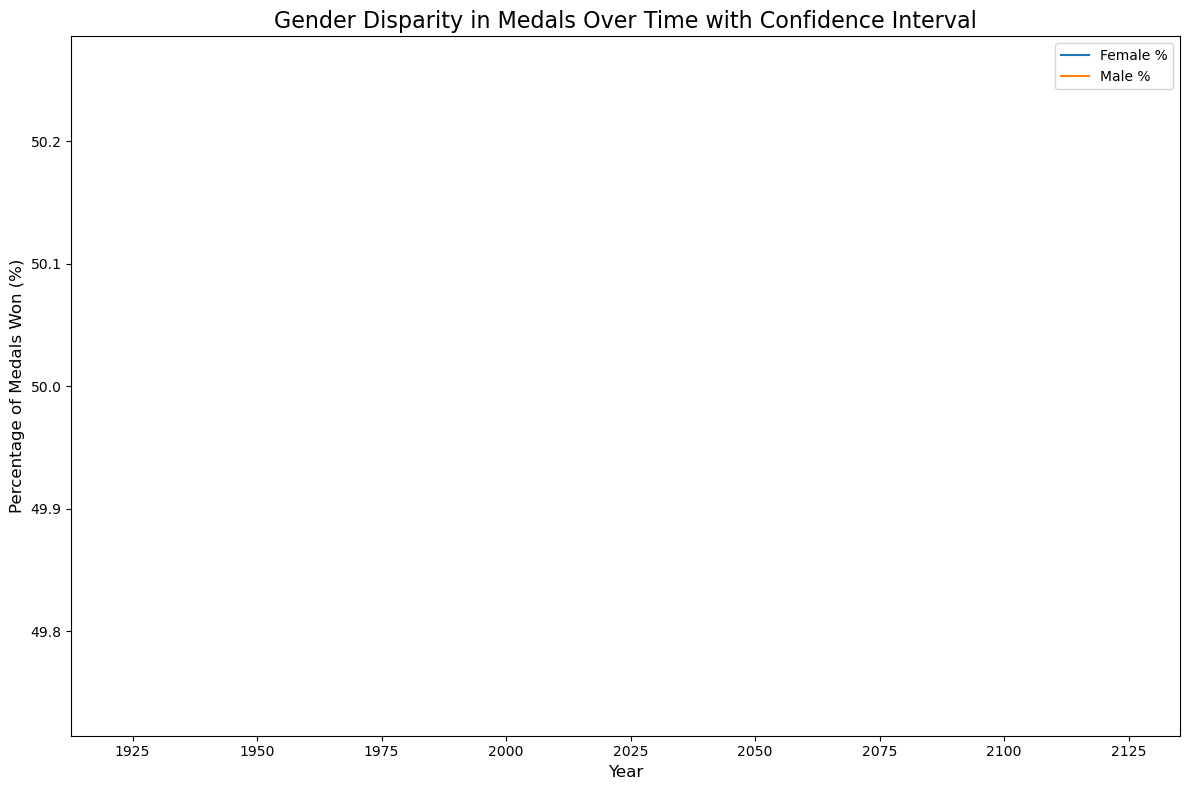

In [82]:
# Line plot with confidence interval using seaborn
plt.figure(figsize=(12, 8))
sns.lineplot(x=gender_year_distribution.index, y='Female %', data=gender_year_distribution, label='Female %', ci='sd')
sns.lineplot(x=gender_year_distribution.index, y='Male %', data=gender_year_distribution, label='Male %', ci='sd')

# Add labels and title
plt.title('Gender Disparity in Medals Over Time with Confidence Interval', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage of Medals Won (%)', fontsize=12)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [86]:
import pandas as pd

# Corrected file path (replace with your actual file path)
file_path = "C:\\Users\\agaje\\Desktop\\EDA\\medallists.csv"

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Drop rows with missing country or medal type information
df_cleaned = df.dropna(subset=['country', 'medal_type'])

# Group by country and medal type to count the number of medals of each type
medals_by_country = df_cleaned.groupby(['country', 'medal_type']).size().unstack().fillna(0)

# Add a total medals column for each country
medals_by_country['Total Medals'] = medals_by_country.sum(axis=1)

# Calculate the ratio of gold medals to total medals for each country
medals_by_country['Gold to Total Ratio'] = medals_by_country['Gold Medal'] / medals_by_country['Total Medals']

# Display the result, sorted by the ratio of gold to total medals
medals_by_country_sorted = medals_by_country.sort_values(by='Gold to Total Ratio', ascending=False)

# Display the countries with their gold to total medal ratios
print(medals_by_country_sorted[['Gold Medal', 'Total Medals', 'Gold to Total Ratio']])


medal_type  Gold Medal  Total Medals  Gold to Total Ratio
country                                                  
Dominica           1.0           1.0             1.000000
Pakistan           1.0           1.0             1.000000
Norway            18.0          23.0             0.782609
Algeria            2.0           3.0             0.666667
Slovenia           2.0           3.0             0.666667
...                ...           ...                  ...
Kyrgyzstan         0.0           6.0             0.000000
Lithuania          0.0           7.0             0.000000
Malaysia           0.0           3.0             0.000000
Mexico             0.0           8.0             0.000000
Zambia             0.0           1.0             0.000000

[92 rows x 3 columns]


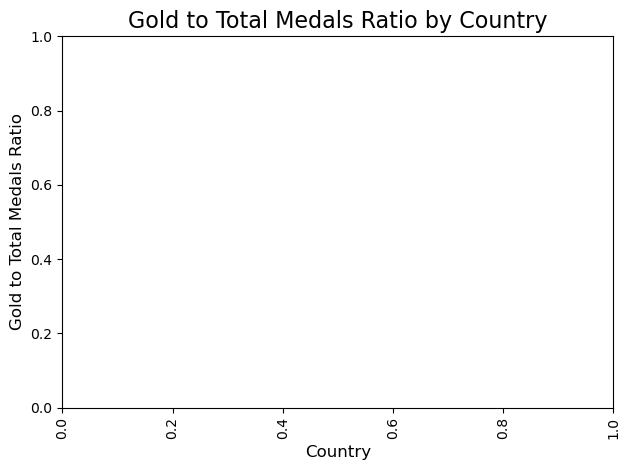

In [88]:
# Add labels and title
plt.title('Gold to Total Medals Ratio by Country', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Gold to Total Medals Ratio', fontsize=12)
plt.xticks(rotation=90)

# Display the plot
plt.tight_layout()
plt.show()

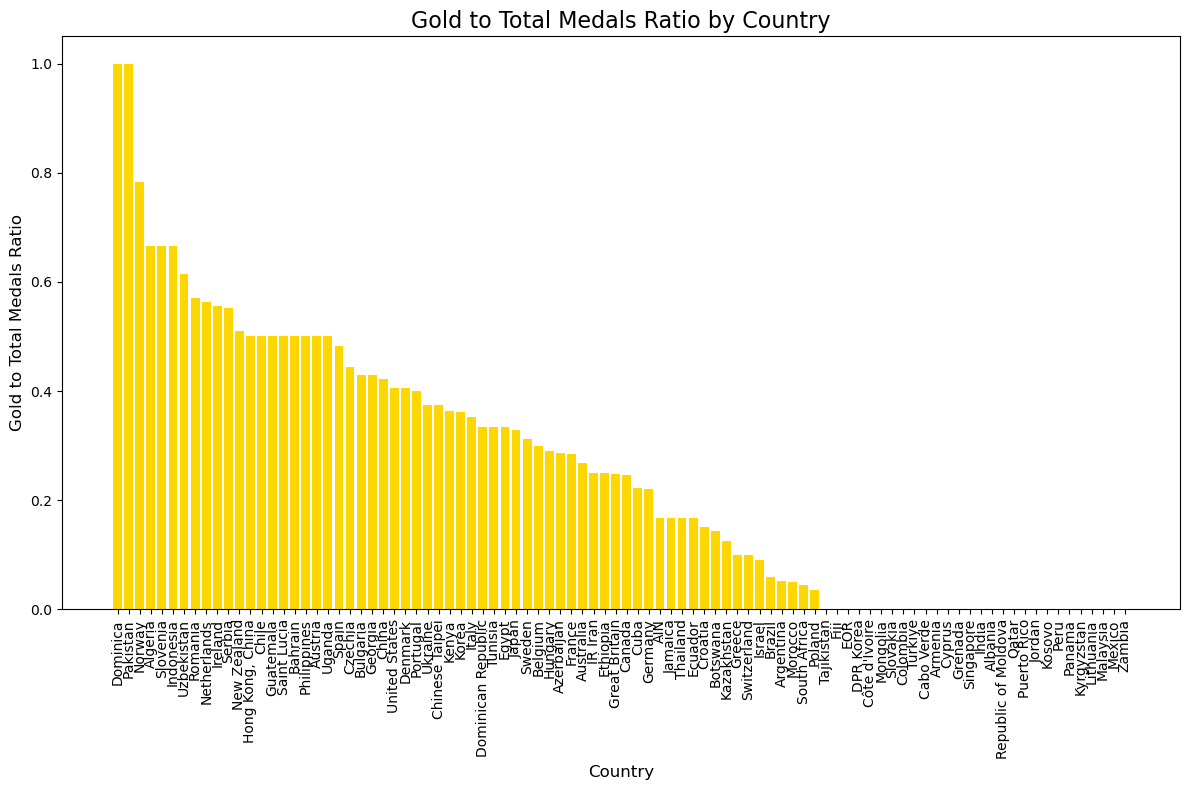

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

# Corrected file path (replace with your actual file path)
file_path = "C:\\Users\\agaje\\Desktop\\EDA\\medallists.csv"

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Drop rows with missing country or medal type information
df_cleaned = df.dropna(subset=['country', 'medal_type'])

# Group by country and medal type to count the number of medals of each type
medals_by_country = df_cleaned.groupby(['country', 'medal_type']).size().unstack().fillna(0)

# Add a total medals column for each country
medals_by_country['Total Medals'] = medals_by_country.sum(axis=1)

# Calculate the ratio of gold medals to total medals for each country
medals_by_country['Gold to Total Ratio'] = medals_by_country['Gold Medal'] / medals_by_country['Total Medals']

# Sort by the ratio of gold to total medals
medals_by_country_sorted = medals_by_country.sort_values(by='Gold to Total Ratio', ascending=False)

# Plot the ratio of gold to total medals for each country
plt.figure(figsize=(12, 8))
plt.bar(medals_by_country_sorted.index, medals_by_country_sorted['Gold to Total Ratio'], color='gold')

# Add labels and title
plt.title('Gold to Total Medals Ratio by Country', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Gold to Total Medals Ratio', fontsize=12)
plt.xticks(rotation=90)

# Display the plot
plt.tight_layout()
plt.show()


In [92]:
import pandas as pd

# Corrected file path (replace with your actual file path)
file_path = "C:\\Users\\agaje\\Desktop\\EDA\\medallists.csv"

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Drop rows with missing country, discipline, or medal type information
df_cleaned = df.dropna(subset=['country', 'discipline', 'medal_type'])

# Group by country and sport (discipline), and count the number of medals won in each sport
country_sport_medals = df_cleaned.groupby(['country', 'discipline']).size().reset_index(name='Medal Count')

# Sort by country and medal count to find countries that consistently win medals in the same sport
consistent_countries = country_sport_medals[country_sport_medals['Medal Count'] > 1].sort_values(by='Medal Count', ascending=False)

# Display the top countries that consistently win medals in certain sports
print(consistent_countries)


           country discipline  Medal Count
476  United States   Swimming           70
454  United States  Athletics           58
31       Australia   Swimming           51
208  Great Britain  Athletics           39
100          China   Swimming           36
..             ...        ...          ...
186        Georgia  Wrestling            2
181         France  Triathlon            2
180         France  Taekwondo            2
177         France    Surfing            2
488     Uzbekistan  Wrestling            2

[285 rows x 3 columns]


KeyError: ['Athlete']